In [2]:
#0.import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
#1.import data
data = pd.read_csv("OnlineRetail.csv", encoding='latin1', low_memory = False) #using encoding = latin1 because we have some special character in latin1

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [5]:
data.shape #shape is just an attribute, not a method. Just use y_pred.shape (no parentheses).

(499428, 8)

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,499428.000000,499428.000000,379979.000000
mean,9.679517,4.481693,15271.312675
std,226.515728,92.194767,1710.629829
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13923.000000
50%,3.000000,2.080000,15116.000000
75%,10.000000,4.130000,16770.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
#dropping columns

data = data.drop(['Description'],axis =1)

data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [9]:
data = data.rename(columns = {"StockCode" : "SKU"})

data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [10]:
data.dtypes #There's no ambiguity here. file is a dataframe, and dtypes is an attribute.

InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
#change invoice date to date type


data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dtypes
data['Date'] = data['InvoiceDate'].apply(lambda x: str(x).split(" "))
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
dtype: object

In [12]:
# use pd.Series.tolist() method to return a list of tuples 
# use pd.DataFrame on the resulting list to turn it into a new pd.DataFrame object, while specifying the original df index
# add to the original df 
data[['date','hour']] = pd.DataFrame(data['Date'].tolist(), index=data.index)
data.dtypes
data['date'] = pd.to_datetime(data['date'])
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date           datetime64[ns]
hour                   object
dtype: object

In [13]:
pd.DataFrame(data.isnull().sum(),columns = ["null values - absolute"])

,null values - absolute
InvoiceNo,0
SKU,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,119449
Country,0
Date,0
date,0
hour,0


In [14]:
pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,3), columns = ["Null Values %"])

,Null Values %
InvoiceNo,0.000
SKU,0.000
Quantity,0.000
InvoiceDate,0.000
UnitPrice,0.000
CustomerID,23.917
Country,0.000
Date,0.000
date,0.000
hour,0.000


In [15]:
data = data.dropna(subset = ['CustomerID']) #379979,10
data.shape

(379979, 10)

In [16]:
#get month ,year and date from date column

data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date           datetime64[ns]
hour                   object
year                    int64
Month                   int64
Day                     int64
dtype: object

In [17]:
#unique count of columns

data['Month'].value_counts()
data['year'].value_counts()

2011    379979
Name: year, dtype: int64

In [19]:
data['year'].unique()

array([2011], dtype=int64)

In [20]:
len(data['year'].unique()) #1

1

In [21]:
len(data['InvoiceNo'].unique())#20482

20482

In [22]:
len(data['SKU'].unique())#3612

3612

In [23]:
len(data['CustomerID'].unique()) #4244

4244

In [24]:
len(data['Country'].unique()) #36

36

In [25]:
len(data['Month'].unique())#12

12

In [26]:
########################################################revenue per month ###################################

In [27]:
import calendar
data['MonthName'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['YearMonth'] = data['year'].astype(str)+","+pd.to_datetime(data['Month'], format='%m').dt.month_name().str.slice(stop=12) 
data["YearMonth"] = data['year'].astype(str) +data['Month'].astype(str)

In [28]:
#Revenue = Active Customer Count * Order Count * Average Revenue per Order

data['revenue'] = data['UnitPrice']*data['Quantity']

data_revenue = data.groupby('Month')['revenue'].sum().reset_index()
#data_revenue = data.groupby('YearMonthNum')['revenue'].sum().reset_index()

In [30]:
# =============================================================================
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

<Axes: ylabel='revenue'>

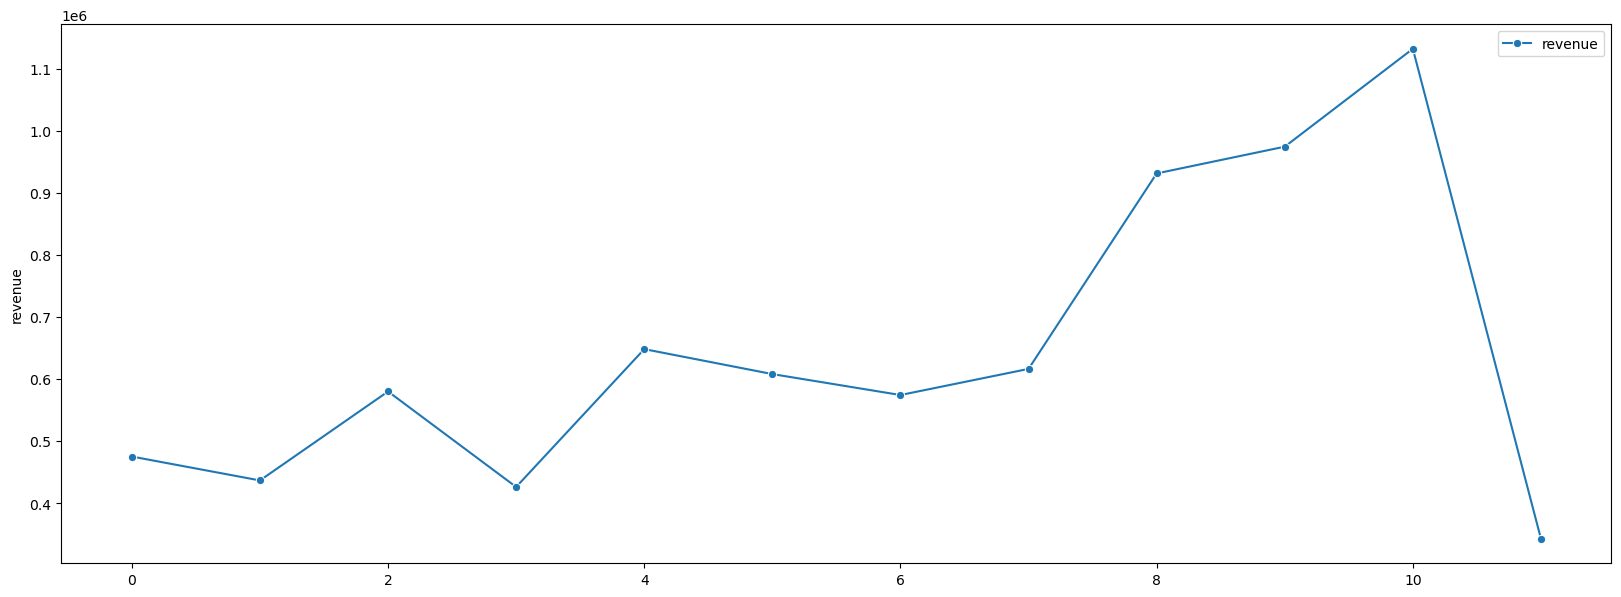

In [41]:
fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(data=data_revenue['revenue'], label = 'revenue', marker = 'o',sort = False)

In [37]:
# sns.lineplot(x='YearMonth', y='revenue', data=data_revenue, sort=False)
# axes.xaxis.set_major_locator(months)
# axes.xaxis.set_major_formatter(years_fmt)
# axes.xaxis.set_minor_locator(months)
# 
# #plt.xticks(rotation = 'vertical')
# plt.show()

In [38]:
# =============================================================================
# data_revenue.plot.bar(x="YearMonth", y="revenue", rot=70, title="Revenue Per Month")
# data_revenue.plot.bar(x="YearMonthNum", y="revenue", rot=70, title="Revenue Per Month")
# 
# 
# 
# #mothly growth
# data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()
# data_revenue.plot.bar(x="YearMonth", y="MonthlyGrowth", rot=70, title="Monthly Growth Per Month")
# data_revenue.set_index('YearMonth')['MonthlyGrowth'].plot();
# 
# 
# data_revenue.set_index('YearMonth')['MonthlyGrowth'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
# plt.xlabel("YearMonth", labelpad=15)
# plt.ylabel("MonthlyGrowth", labelpad=15)
# plt.title("Monhtly Growth Rate", y=1.02, fontsize=22);
# =============================================================================

Text(0.5, 1.0, 'Revenue Per Month')

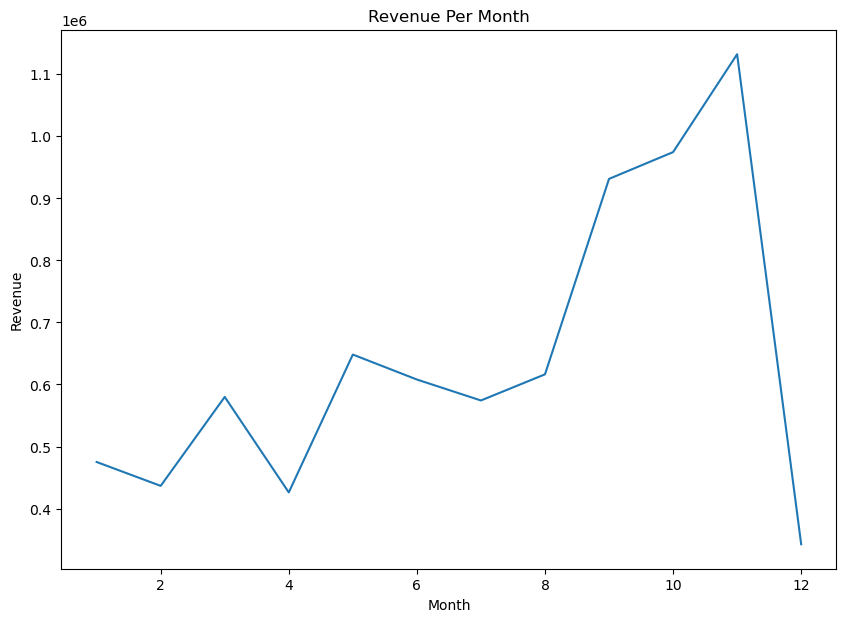

In [40]:
fig, axes = plt.subplots(figsize=(10,7))
ax = sns.lineplot(x='Month', y='revenue', data=data_revenue, sort=False)

ax.set(xlabel="Month", ylabel = "Revenue")
ax.set_title('Revenue Per Month')

In [42]:
#####You can see that august's revenue is h

In [43]:
# =============================================================================
# data['Month'] = pd.Categorical(data['Month'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
# data.sort_values("Month")
# 
# data_revenue = data.groupby('Month')['revenue'].sum().reset_index()
# 
# 
# fig, axes = plt.subplots(figsize=(20,7))
# 
# sns.lineplot(x='Month', y='revenue', data=data_revenue, sort=False)
# 
# 
# data_revenue['YearMonth'] = pd.Categorical(data['YearMonth'], ['201112','20101', '20102', '20103', '20104', '20105', '20106', '20107', '20108', '20109', '201010', '201011', '201012'])
# data_revenue.sort_values("YearMonth")
# 
# =============================================================================

C:\Users\Pavillion\AppData\Local\Temp\ipykernel_9012\2238312878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)


Text(0.5, 1.0, 'Rate of Monthly Growth')

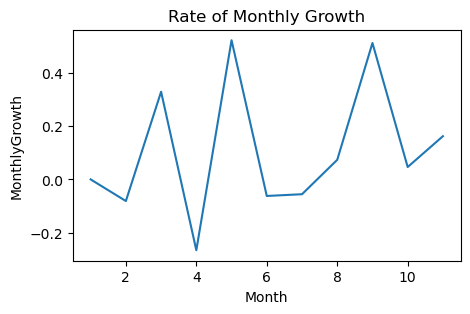

In [44]:
############################################### mothly growth #################################################
data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()

data_revenue = data_revenue.loc[data_revenue['Month'] != 12]

#For one column using pandas:
data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)
#For one column using numpy:
#data_revenue['MonhtlyGrowth'] = data_revnue['MontlyGrowth'].replace(np.nan, 0)
fig, axes = plt.subplots(figsize=(5,3))

ax = sns.lineplot(x='Month', y='MonthlyGrowth', data=data_revenue, sort=False)

ax.set(xlabel="Month", ylabel = "MonthlyGrowth")
ax.set_title('Rate of Monthly Growth')

In [47]:
# label points on the plot
# =============================================================================
# for x, y in zip(data_monthly_active['Month'], data_monthly_active['CustomerID']):
#     plt.text(x = x, y = y, s ='{:.0f}'.format(y),color = 'purple' )
#     
plt.show()
# =============================================================================

In [48]:
# =============================================================================
#  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
#  plt.text(x = x, # x-coordinate position of data label
#  y = y-150, # y-coordinate position of data label, adjusted to be 150 below the data point
#  s = ‘{:.0f}’.format(y), # data label, formatted to ignore decimals
#  color = ‘purple’) # set colour of line
# 
# =============================================================================

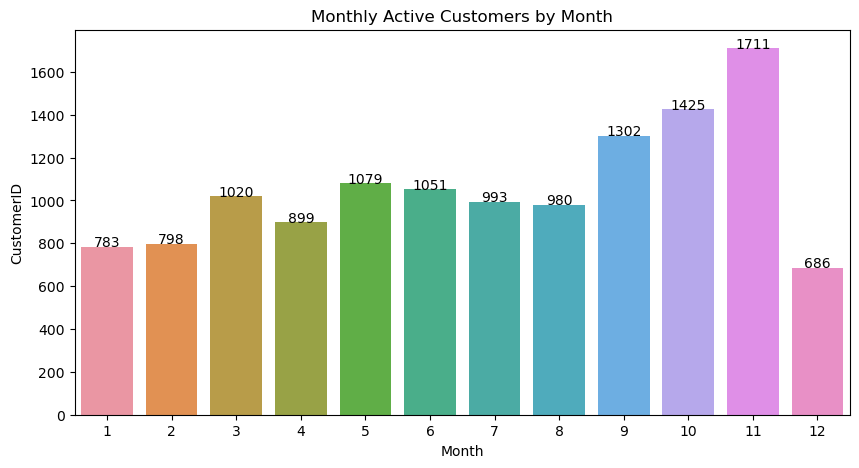

In [49]:
###################monthly active customers by counting unique CUstomer ID

data_monthly_active = data.groupby('Month')['CustomerID'].nunique().reset_index()

data_monthly_active

fig, axes = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'Month',
            y = 'CustomerID',
            data = data_monthly_active)
ax.set(xlabel="Month", ylabel = "CustomerID")
ax.set_title('Monthly Active Customers by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
    
plt.show()

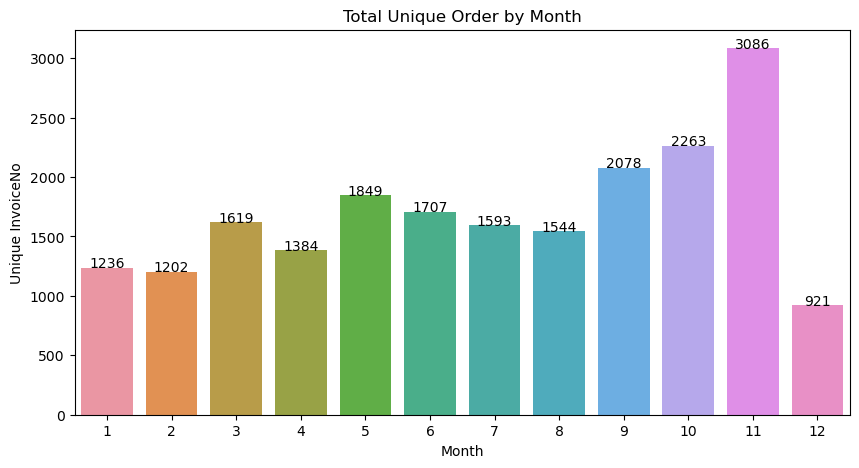

In [50]:
##################################distinct order by month

data_unique_order = data.groupby('Month')['InvoiceNo'].nunique().reset_index()

fig, axes = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'Month',
            y = 'InvoiceNo',
            data = data_unique_order)
ax.set(xlabel="Month", ylabel = "Unique InvoiceNo")
ax.set_title('Total Unique Order by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
    
plt.show()

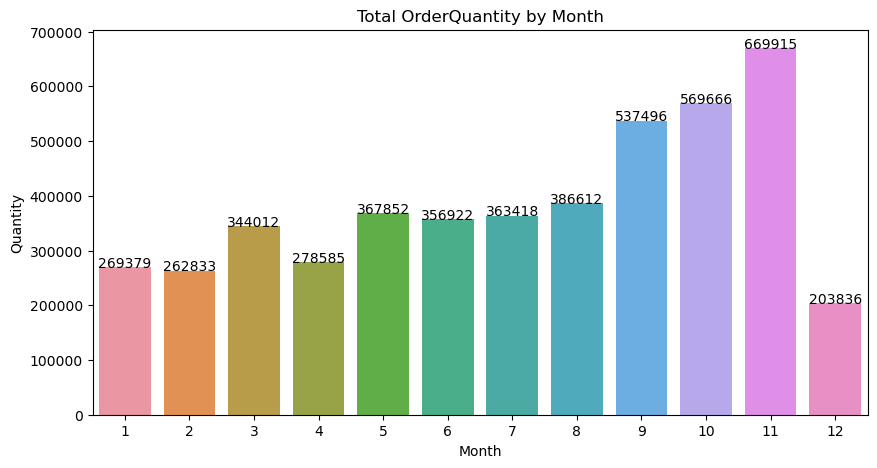

In [51]:
##########################total orderquantity on a monthly basis


data_order_sales = data.groupby('Month')['Quantity'].sum().reset_index()

fig, axes = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'Month',
            y = 'Quantity',
            data = data_order_sales)
ax.set(xlabel="Month", ylabel = "Quantity")
ax.set_title('Total OrderQuantity by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
    
plt.show()

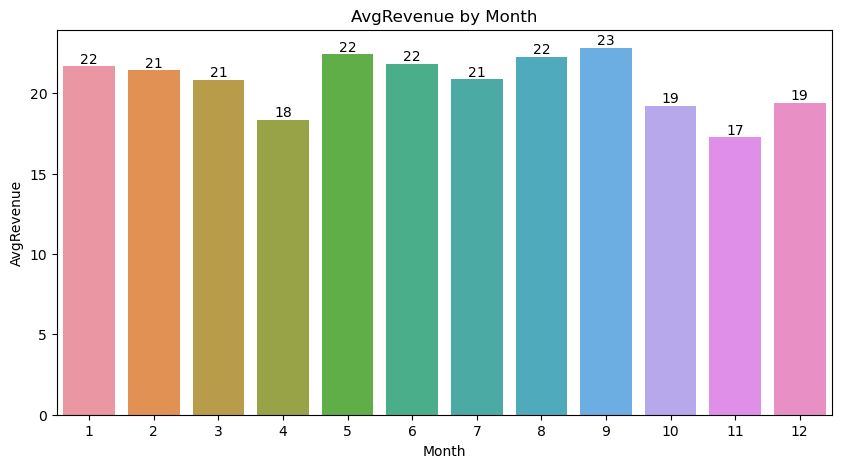

In [52]:
#########################################average revenue per order

data_avg_revenue = data.groupby('Month')['revenue'].mean().reset_index()

fig, axes = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'Month',
            y = 'revenue',
            data = data_avg_revenue)
ax.set(xlabel="Month", ylabel = "AvgRevenue")
ax.set_title('AvgRevenue by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
    
plt.show()

#average revenue by month for april decreased 

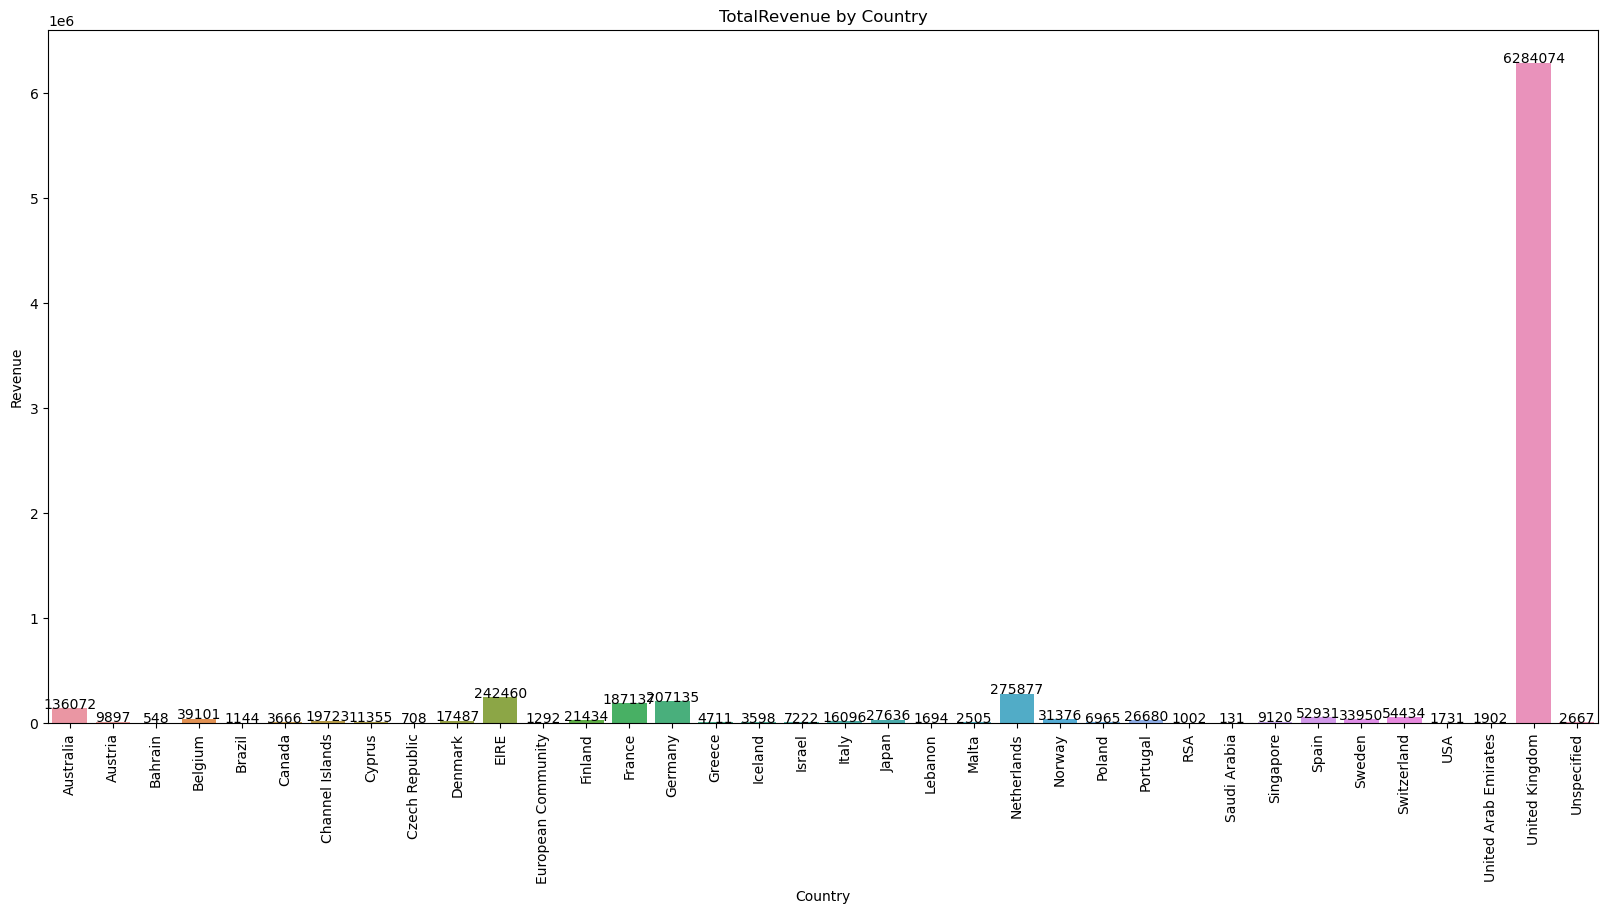

In [53]:
##############revenue by country
data_country_revenue = data.groupby('Country')['revenue'].sum().reset_index()
fig, axes = plt.subplots(figsize=(20,9))
ax = sns.barplot(x = 'Country',
            y = 'revenue',
            data = data_country_revenue)
ax.set(xlabel="Country", ylabel = "Revenue")
ax.set_title('TotalRevenue by Country')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')    
plt.show()

In [54]:
#New customer vs exisiting customer



# =============================================================================
# New Customer Ratio: a good indicator of if we are losing our existing customers or unable to attract new ones
# Retention Rate: King of the metrics. Indicates how many customers we retain over specific time window. 
# We will be showing examples for monthly retention rate and cohort based retention rate.
# 
# =============================================================================

In [55]:
#########What is a new customer?
#what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first 
#purchase in the time window we defined. 

# =============================================================================
# We will be using .min() function to find our first purchase date for each customer and define new customers based on that.
# The code below will apply this function and show us the revenue breakdown for each group monthly.
# 
# =============================================================================

In [56]:
data_min_date_buy = data.groupby('CustomerID').date.min().reset_index()

data_min_date_buy.columns = ['CustomerID','MinPurchaseDate']
data_min_date_buy['MinPurchaseYearMonth'] = data_min_date_buy['MinPurchaseDate'].map(lambda date: date.month)

#merge first purchase date column to our main dataframe (tx_uk)
data = pd.merge(data, data_min_date_buy, on='CustomerID')

data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,year,Month,Day,MonthName,YearMonth,revenue,MinPurchaseDate,MinPurchaseYearMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,Jan,20111,19.5,2011-01-04,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,Jan,20111,10.5,2011-01-04,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,Jan,20111,10.5,2011-01-04,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,Jan,20111,10.5,2011-01-04,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,Jan,20111,12.5,2011-01-04,1


In [57]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
data['UserType'] = 'New'
data.loc[data['Month']>data['MinPurchaseYearMonth'],'UserType'] = 'Existing'

Text(0.5, 1.0, 'Revenue for Usertype')

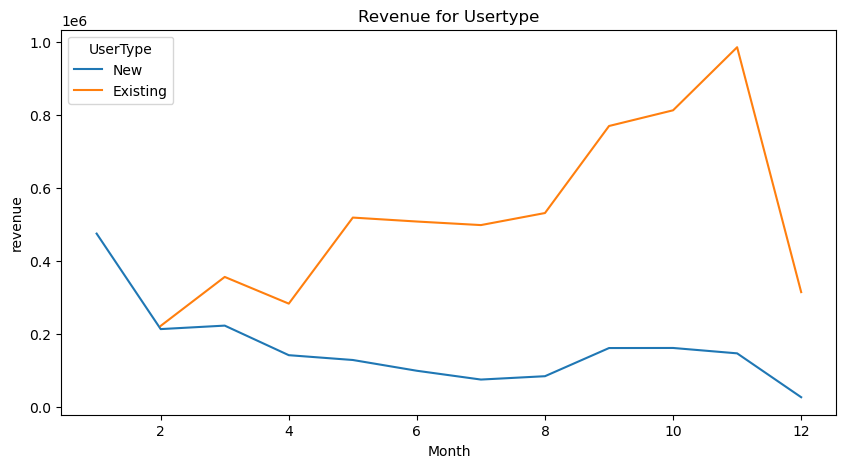

In [58]:
#calculate the Revenue per month for each user type
data_userType_revenue = data.groupby(['Month','UserType'])['revenue'].sum().reset_index()

fig, axes = plt.subplots(figsize=(10,5))

ax = sns.lineplot(data=data_userType_revenue, x="Month", y="revenue", hue="UserType")


ax.set_title('Revenue for Usertype')


In [59]:
#new customer ratio
# =============================================================================
# 
# data_cust_user_ratio = data.query("UserType == 'New'").groupby(['Month'])['CustomerID'].nunique()/data.query("UserType == 'Existing'").groupby(['Month'])['CustomerID'].nunique()
# tx_user_ratio = tx_user_ratio.dropna()
# 
# =============================================================================

In [60]:
#monthly retenion rate
data_user_purchase = data.groupby(['CustomerID','Month'])['revenue'].sum().reset_index()

In [61]:
#create retention matrix with crosstab
data_user_retention = pd.crosstab(data_user_purchase['CustomerID'], data_user_purchase['Month']).reset_index()

data_user_retention.head()

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = data_user_retention.columns[1:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['Month'] = int(selected_month)
    retention_data['TotalUser'] = data_user_retention[selected_month].sum()
    retention_data['RetainedUser'] = data_user_retention[(data_user_retention[selected_month]>0) & (data_user_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

Text(0.5, 1.0, 'Retention Rate by Month')

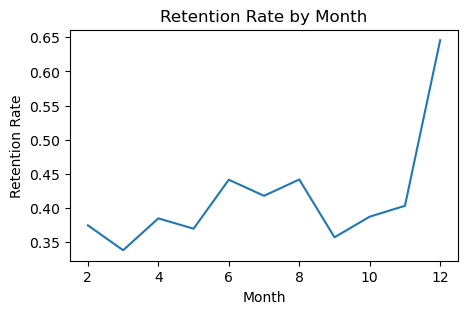

In [63]:
#convert the array to dataframe and calculate Retention Rate
user_retention = pd.DataFrame(retention_array)
user_retention['RetentionRate'] = user_retention['RetainedUser']/user_retention['TotalUser']
fig, axes = plt.subplots(figsize=(5,3))

ax = sns.lineplot(x='Month', y='RetentionRate', data=user_retention, sort=False)

ax.set(xlabel="Month", ylabel = "Retention Rate")
ax.set_title('Retention Rate by Month')

In [64]:
#######################Customer Segmentation###########################


###################Recency#################################


In [65]:
data_user = pd.DataFrame(data['CustomerID'].unique())
data_user.columns = ['CustomerID']

In [66]:
#get the max purchase date for each customer and create a dataframe with it
data_max_purchase = data.groupby('CustomerID').date.max().reset_index()
data_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [68]:
#we take our observation point as the max invoice date in our dataset
data_max_purchase['Recency'] = (data_max_purchase['MaxPurchaseDate'].max() - data_max_purchase['MaxPurchaseDate']).dt.days

In [69]:
#merge this dataframe to our new user dataframe
data_user = pd.merge(data_user, data_max_purchase[['CustomerID','Recency']], on='CustomerID')

C:\Users\Pavillion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pavillion\AppData\Local\Temp\ipykernel_9012\908585676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recency["clusters"] = kmeans.labels_
C:\Users\Pavillion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pavillion\AppData\Local\Temp\ipy

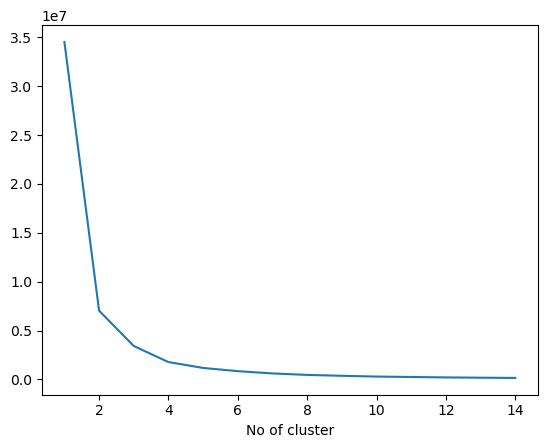

In [74]:
from sklearn.cluster import KMeans

sse={}
user_recency = data_user[['Recency']]
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_recency)
    user_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of cluster")
plt.show()

In [75]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_user[['Recency']])
data_user['RecencyCluster'] = kmeans.predict(data_user[['Recency']])

C:\Users\Pavillion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

data_user = order_cluster('RecencyCluster', 'Recency',data_user,False)

data_user.describe()

,CustomerID,Recency,RecencyCluster
count,4244.000000,4244.000000,4244.000000
mean,15289.233506,83.337653,1.524034
std,1719.953211,90.213455,0.734097
min,12346.000000,0.000000,0.000000
25%,13804.750000,16.000000,1.000000
50%,15286.500000,46.000000,2.000000
75%,16769.250000,127.000000,2.000000
max,18287.000000,339.000000,2.000000


In [77]:
#freqyency
data_frequency = data.groupby('CustomerID').date.count().reset_index()
data_frequency.columns = ['CustomerID','Frequency']

In [78]:
#add this data to our main dataframe
data_user = pd.merge(data_user, data_frequency, on='CustomerID')

kmeans = KMeans(n_clusters=3)
kmeans.fit(data_frequency[['Frequency']])
data_user['FrequencyCluster'] = kmeans.predict(data_user[['Frequency']])

C:\Users\Pavillion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
#order the frequency cluster
data_user = order_cluster('FrequencyCluster', 'Frequency',data_user,True)

In [80]:
#see details of each cluster
data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3955.0,56.945386,55.915836,1.0,16.0,36.0,82.00,260.0
1,285.0,464.501754,302.871639,261.0,299.0,366.0,493.00,2550.0
2,4.0,5594.250000,1554.533665,3972.0,4839.0,5356.5,6111.75,7692.0


In [81]:
#revenue


data['Revenue'] = data['UnitPrice'] * data['Quantity']
data_revenue = data.groupby('CustomerID').Revenue.sum().reset_index()

In [82]:
#merge it with our main dataframe
data_user = pd.merge(data_user, data_revenue, on='CustomerID')


kmeans = KMeans(n_clusters=3)
kmeans.fit(data_user[['Revenue']])
data_user['RevenueCluster'] = kmeans.predict(data_user[['Revenue']])

C:\Users\Pavillion\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
#order the cluster numbers
data_user = order_cluster('RevenueCluster', 'Revenue',data_user,True)

In [84]:
#show details of the dataframe
data_user.groupby('RevenueCluster')['Revenue'].describe()



data_user['OverallScore'] = data_user['RecencyCluster'] + data_user['FrequencyCluster'] + data_user['RevenueCluster']
data_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

C:\Users\Pavillion\AppData\Local\Temp\ipykernel_9012\3723457770.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()


,Recency,Frequency,Revenue
OverallScore,,,
0,265.783388,22.035831,400.746337
1,137.013977,38.198221,712.303914
2,30.920815,71.361035,1365.541977
3,13.489051,431.762774,6725.946460
4,6.166667,1238.250000,58887.124167
5,2.500000,3530.500000,150961.326667
